2. 회귀 데이터셋 -> AI가 수치를 예측하는 방식

- 회귀(Regression)
  - 어떤 입력 값에 대해 결과값(연속적인 수치)를 예측
  - ex) 키 -> 몸무게 예측, 공부시간 -> 시험점수 예측, 집 크기 -> 집값 예측

  * 명명) '평균으로 되돌아가는 현상'에서 나온 통계 용어였으니 ML/DL에서 단순히 '연속적인 값을 예측하는 모델'로 통칭

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4)
rng = np.random.default_rng(0)

# 데이터 생성
x = np.linspace(-5, 5, 100) # 독립변수 x
noise = rng.normal(0, 1.0, size=x.shape) # 노이즈
y = 3*x + 5 + noise # 종속변수(타겟) y = x와의 선형 + 잡음

df = pd.DataFrame({"x": x, "y": y})
df.head()

,x,y
0,-5.00000,-9.874270
1,-4.89899,-9.829075
2,-4.79798,-8.753517
3,-4.69697,-8.986009
4,-4.59596,-9.323548


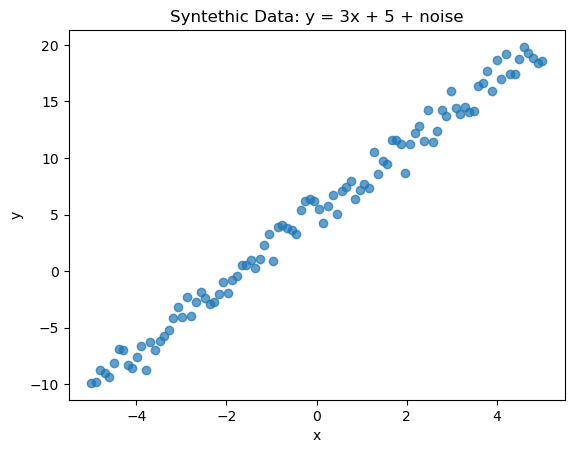

In [2]:
# 시각화 (산점도)
plt.scatter(df["x"], df["y"], alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Syntethic Data: y = 3x + 5 + noise")
plt.show()

In [ ]:
# 선형회귀 직접해법
"""
선형회귀 : 데이터가 있을때, 직선(혹은 초평면)을 그어서 그 데이터에 가장 잘 맞추는 것
          ex) y = wx + b (w:기울기, b:절편(bias))
-> y의 오차 제곱의 합이 최소인 직선을 긋는 것이 best (최소제곱법)
* 분산은 x에 대한 것. 즉, 입력 데이터 자체의 흩어짐
* 최소제곱법, 이를 평균낸 MSE는 실제값 y에 대한 것. 즉, 모델의 정확도

직접 해법 (Normal Equation)
: 수학적으로 미분해서 딱 떨어지는 해를 구함.
  즉, 컴퓨터가 경사하강법으로 조금씩 조정하면서 w,b를 찾아내는 게 아니라,
      계산으로(공식을 풀어서) 바로 최적의 w,b를 얻는 것

선형회귀 직접 해법
: w_hat = (X_T * X)^-1 * X_T * y (X는 상수항 1을 포함한 디자인 행렬, X_T는 X의 전치행렬)
-> 각 샘플 x에 대해 [1, x]로 행 쌓기
"""

# 디자인 행렬 X : (N, 2) = [1, x]
N = len(x)
X = np.column_stack([np.ones(N), x]) # np.ones(N) 옆에 x 붙임 => (100, 2)

# 행렬 곱 수행을 위해 y를 (N,1)로 reshape
y_vec = y.reshape(-1, 1)

# (1) 역행렬 방식 (수치적 불안정 가능)
w_hat_inv = np.linalg.inv(X.T @ X) @ X.T @ y_vec
# (2) 의사역행렬 방식 (안정적, 권장)
"""
역행렬은 정사각행렬에서만 가능
의사역행렬(Pseudo-inverse) : 역행렬 없을 때도 가장 근사한 해를 구하는 일반화된 개념
                           => 정사각형이 아니여도 사용O
의사역행렬 방식 선형회귀 직접해법 공식
: w_hat = X_psudo * y

"""
w_hat_pinv = np.linalg.pinv(X) @ y_vec

print("역행렬 방식:", w_hat_inv.ravel())
print("의사역행렬 방식:", w_hat_pinv.ravel())
# 결과: [b, w]

역행렬 방식: [5.0811 3.0146]
의사역행렬 방식: [5.0811 3.0146]


추정된 계수: y = 3.015x + 5.081


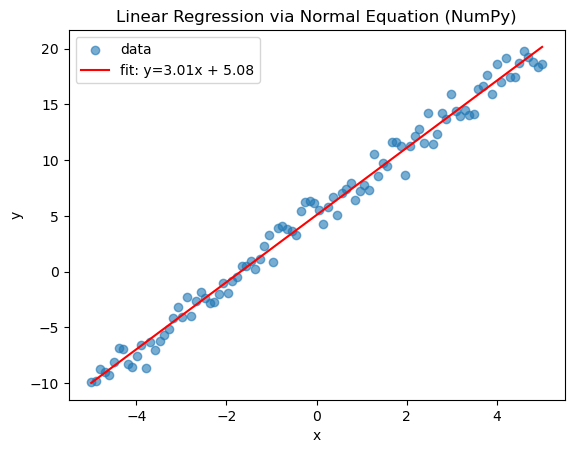

In [5]:
# 결과 해석 (의사역행렬 결과 사용)
b_hat, w_hat = float(w_hat_pinv[0, 0]), float(w_hat_pinv[1, 0])
print(f"추정된 계수: y = {w_hat:.3f}x + {b_hat:.3f}")

# 예측값
y_pred = X @ w_hat_pinv # 행렬로 쓰면 X가 [1, x], 의사역행렬 결과가 [b, w] 이므로 곱하면 wx+b 형태됨

# 그래프
plt.scatter(x, y, alpha=0.6, label="data")
plt.plot(x, y_pred.ravel(), "r-", label=f"fit: y={w_hat:.2f}x + {b_hat:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression via Normal Equation (NumPy)")
plt.show()

In [6]:
"""
검증
- inv vs pinv 예측 비교
- MSE(평균제곱오차)
"""

# 예측 비교
y_pred_inv = (X @ w_hat_inv).ravel()
y_pred_pinv = (X @ w_hat_pinv).ravel()
print("inv vs pinv 예측 일치?:", np.allclose(y_pred_inv, y_pred_pinv, rtol=1e-6)) # 상대오차 허용치=1e-6

# 평균제곱오차
mse = np.mean((y - y_pred_pinv)**2)
print(f"MSE = {mse:.4f}")

inv vs pinv 예측 일치?: True
MSE = 0.9239
